In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from time import perf_counter, sleep
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv")
data.head()

,Unnamed: 0,x,y
0,0,96.597780,97761.592016
1,1,48.002892,27613.989207
2,2,47.939756,29410.187753
3,3,47.809026,15789.597531
4,4,69.784427,20953.383453


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


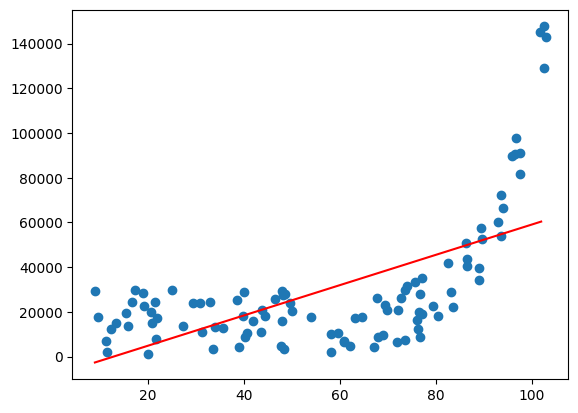

In [7]:
X = data.x
y = data.y
X = pd.DataFrame(X)
start1 = perf_counter()
linear = LinearRegression().fit(X, y)
end1 = perf_counter()
xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))
plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.7359753787024842

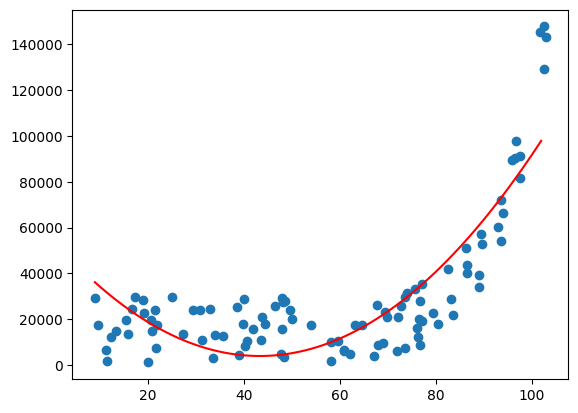

In [8]:
from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)
start2 = perf_counter()
poly_2d = LinearRegression().fit(X_2, y)
end2 = perf_counter()
xx_2d = transformation.transform(pd.DataFrame(xx))
yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')
ac = poly_2d.score(X_2, y)
ac

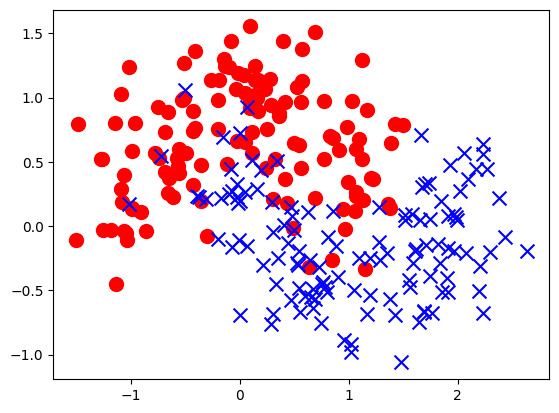

In [9]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


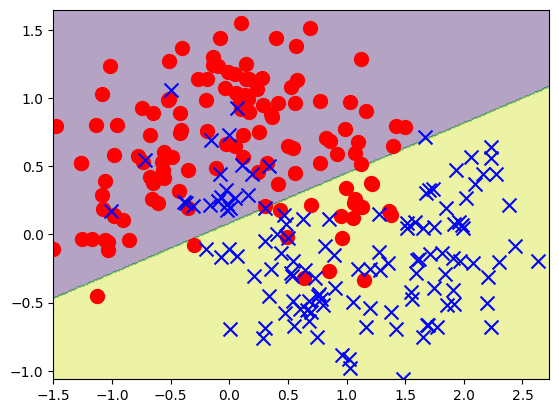

In [10]:
from sklearn.linear_model import LogisticRegression
start3 = perf_counter()
logistic = LogisticRegression().fit(X, y)
end3 = perf_counter()
xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
Z = logistic.predict(XX).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


0.9

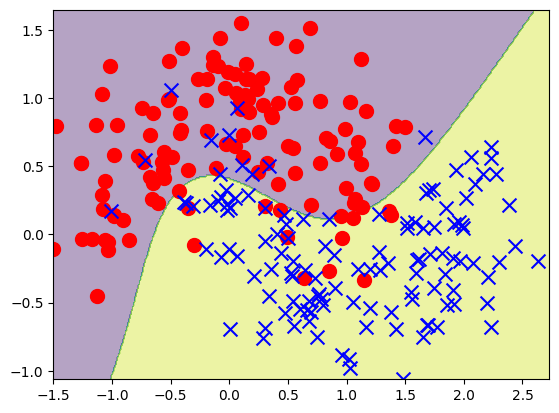

In [11]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
start4 = perf_counter()
class_3 = LogisticRegression().fit(X_3, y)
end4 = perf_counter()
Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)
class_3.score(X_3, y)

In [12]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [13]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [14]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

In [15]:
start5 = perf_counter()
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end5 = perf_counter()
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

0.699747189010915

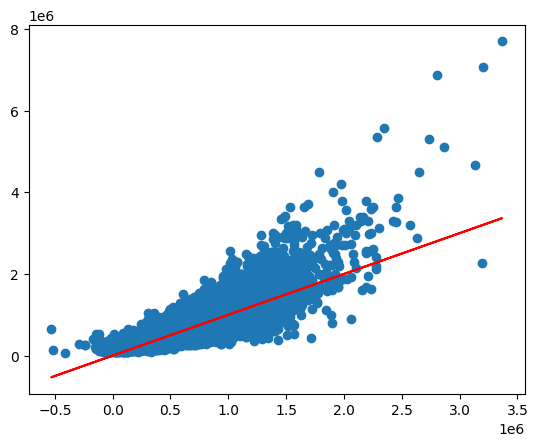

In [16]:
y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

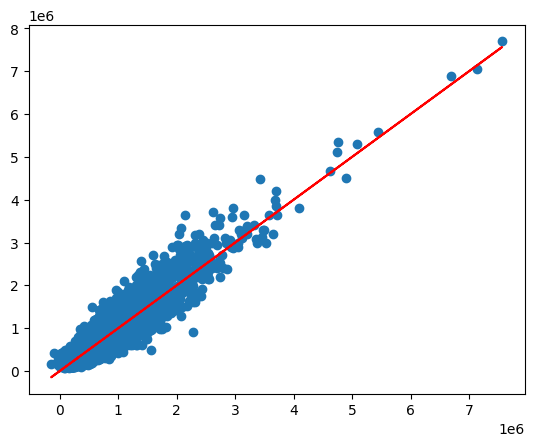

In [17]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
start6 = perf_counter()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end6 = perf_counter()
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

1. В выполненной работе добавьте замер времени обучения каждой модели.

In [18]:
print(f"First model: {end1-start1}")
print(f"Second model: {end2-start2}")
print(f"Third model: {end3-start3}")
print(f"Fourthlearn model: {end4-start4}")
print(f"Fifth model: {end5-start5}")
print(f"Six model: {end6-start6}")

First model: 0.031017648999750236
Second model: 0.025351976999900216
Third model: 0.016710525999769743
Fourthlearn model: 0.00967350799965061
Fifth model: 0.07590118899997833
Six model: 7.454258048000156


2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

Порядок 5 - Время обучения: 0.0014 секунд
Порядок 5 - Эффективность: 0.9217

Порядок 10 - Время обучения: 0.0034 секунд
Порядок 10 - Эффективность: 0.9232

Порядок 100 - Время обучения: 0.0044 секунд
Порядок 100 - Эффективность: 0.7925



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


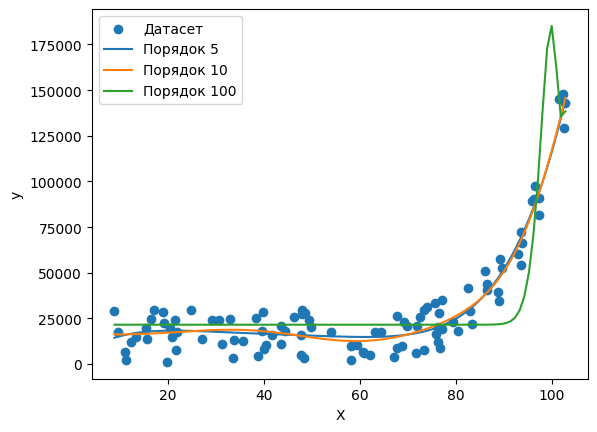

In [19]:
import time
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv"
data = pd.read_csv(url)
X = data[['x']]
y = data['y']
degrees = [5, 10, 100]

plt.scatter(X, y, label='Датасет')

for degree in degrees:
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X)
    model = LinearRegression()
    start_time = time.time()

    model.fit(X_poly, y)
    end_time = time.time()
    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred = model.predict(X_range_poly)
    print(f"Порядок {degree} - Время обучения: {end_time - start_time:.4f} секунд")
    print(f"Порядок {degree} - Эффективность: {model.score(X_poly, y):.4f}\n")
    plt.plot(X_range, y_pred, label=f'Порядок {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

3. То же самое проделайте с датасетом для классификации и "King county".

In [20]:
from sklearn.model_selection import train_test_split
import pandas as pd


Degree 5 - Training time: 0.0046 seconds
Degree 5 - R-squared: -4265931838588823023674555946791600128.0000

Degree 10 - Training time: 0.0089 seconds
Degree 10 - R-squared: -76261238988221866023029614709921412561958429116619569313692813619022821851409401511936.0000



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_polynomial.py:440: RuntimeWarning: overflow encountered in multiply
  np.multiply(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_polynomial.py:440: RuntimeWarning: overflow encountered in multiply
  np.multiply(


ValueError: ignored

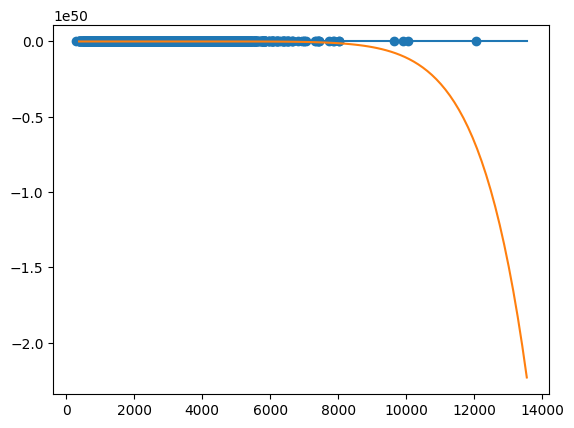

In [33]:
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)

X_kc = data_kc_prices[['sqft_living']]
y_kc = data_kc_prices['price']
X_train, X_test, y_train, y_test = train_test_split(X_kc, y_kc, test_size=0.2, random_state=42)

degrees = [5, 10, 100]

plt.scatter(X_train, y_train, label='Training Data')

for degree in degrees:
    transformation = PolynomialFeatures(degree=degree)
    X_train_poly = transformation.fit_transform(X_train)
    X_test_poly = transformation.transform(X_test)

    from sklearn.preprocessing import StandardScaler

    scaler = StandardScaler()
    X_train_poly = scaler.fit_transform(X_train_poly)

    model = LinearRegression()
    start_time = time.time()
    model.fit(X_train_poly, y_train)
    end_time = time.time()
    y_pred = model.predict(X_test_poly)

    print(f"Degree {degree} - Training time: {end_time - start_time:.4f} seconds")
    print(f"Degree {degree} - R-squared: {model.score(X_test_poly, y_test):.4f}\n")

    X_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred_range = model.predict(X_range_poly)
    plt.plot(X_range, y_pred_range, label=f'Degree {degree}')

plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()

4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


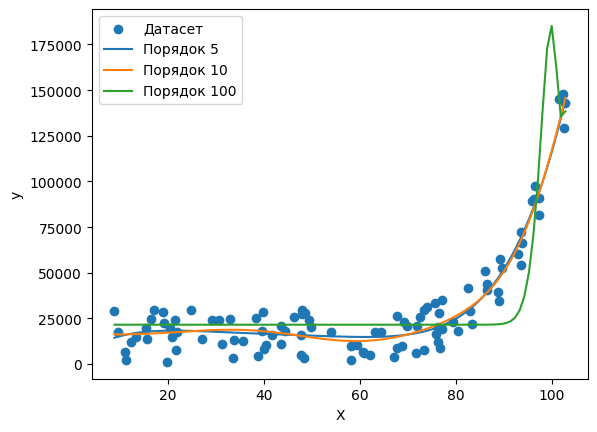

   Порядок  Время обучения (секунды)  Эффективность
0        5                  0.001436       0.921748
1       10                  0.002418       0.923200
2      100                  0.003366       0.792462


In [34]:
url = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_regression.csv"
data = pd.read_csv(url)

X = data[['x']]
y = data['y']

degrees = [5, 10, 100]
results_list = []
plt.scatter(X, y, label='Датасет')

for degree in degrees:
    transformation = PolynomialFeatures(degree=degree)
    X_poly = transformation.fit_transform(X)
    model = LinearRegression()

    start_time = time.time()
    model.fit(X_poly, y)
    end_time = time.time()

    X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    X_range_poly = transformation.transform(X_range)
    y_pred = model.predict(X_range_poly)
    results_list.append({
        'Порядок': degree,
        'Время обучения (секунды)': end_time - start_time,
        'Эффективность': model.score(X_poly, y)
    })
    plt.plot(X_range, y_pred, label=f'Порядок {degree}')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

results = pd.DataFrame(results_list)
print(results)

5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [36]:
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)
start_time = time.time()  # начало
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
end_time = time.time()  # конец
training_time = end_time - start_time  # подсчет времени
print(f"Время обучения модели: {training_time:.4f} секунд")

coefficients = reg_kc_multiple.coef_
intercept = reg_kc_multiple.intercept_

print("Коэффициенты:")
for feature, coef in zip(X_kc_prices.columns, coefficients):
    print(f"{feature}: {coef}")

print("\nИнтерсепт:", intercept)

Время обучения модели: 0.0153 секунд
Коэффициенты:
bedrooms: -35766.54144362941
bathrooms: 41144.27853237157
sqft_living: 110.44286457691003
sqft_lot: 0.1285978691263798
floors: 6689.550115105011
waterfront: 582960.4584234621
view: 52870.94238431031
condition: 26385.649138592697
grade: 95890.44515147626
sqft_above: 70.78522435876927
sqft_basement: 39.65763999343623
yr_built: -2620.2232112952365
yr_renovated: 19.81258370916596
zipcode: -582.4198656403075
lat: 602748.2264485636
long: -214729.8282532986
sqft_living15: 21.68140046131072
sqft_lot15: -0.3826418495445978

Интерсепт: 6690324.603102473


6.Попробуйте также проинтерпретировать полиномиальную модель.

In [37]:
url_kc = "https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv"
data_kc_prices = pd.read_csv(url_kc)
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

poly_features_kc_prices = PolynomialFeatures(degree=3)
X_3_kc_prices = poly_features_kc_prices.fit_transform(X_kc_prices)

start_time = time.time()
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
end_time = time.time()
training_time = end_time - start_time
print(f"Время обучения модели: {training_time:.4f} секунд")

coefficients_poly2_kc = reg_poly2_kc.coef_
intercept_poly2_kc = reg_poly2_kc.intercept_

print("Коэффициенты:")
for feature, coef in zip(poly_features_kc_prices.get_feature_names_out(X_kc_prices.columns), coefficients_poly2_kc):
    print(f"{feature}: {coef}")

print("Пинтерсепт:", intercept_poly2_kc)

Время обучения модели: 6.7905 секунд
Коэффициенты:
1: -13.452385987599081
bedrooms: 0.8462611267943563
bathrooms: -8.344991468915065
sqft_living: -1.6921555708169076
sqft_lot: 1.957302786064621
floors: 0.8422411772796672
waterfront: -1.9851715187420702
view: 1.9271471065365655
condition: 0.21260336702918903
grade: -0.1365902359990622
sqft_above: -0.34005549139267066
sqft_basement: -0.009699266181264198
yr_built: -0.017088112071909318
yr_renovated: 0.09994590634480509
zipcode: -0.038260790366100215
lat: -0.005564595113590514
long: -0.029887606712883662
sqft_living15: -0.04597287281369414
sqft_lot15: -0.014084297688492725
bedrooms^2: 0.045576727532501714
bedrooms bathrooms: -0.00029819713980749587
bedrooms sqft_living: 3.8456574932693295
bedrooms sqft_lot: 35.22693063581089
bedrooms floors: 0.013809957149952487
bedrooms waterfront: -0.024392873040960196
bedrooms view: 0.009270647752230918
bedrooms condition: 0.011454483291432872
bedrooms grade: 0.011280401597130833
bedrooms sqft_above: 3